In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/Colab Notebooks/WRI-Hackathon/python_scripts/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/WRI-Hackathon/python_scripts/dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read datasets

In [3]:
df = pd.read_csv('inflow_dataset.csv')
df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
0,2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0
1,2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0
2,2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0
3,2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0
4,2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...
13237,2020-02-29,Harangi,3.54,2834,40.0,40.0,2020,2,29,365
13238,2016-02-29,Kabini,8.35,2262.62,118.0,1000.0,2016,2,29,365
13239,2020-02-29,Kabini,15.48,2277.20,112.0,1700.0,2020,2,29,365
13240,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365


In [4]:
rainfall_df = pd.read_csv('Rainfall 2010-2020/rainfall_dataset.csv')
rainfall_df

,DISTRICTS,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,BAGALKOTE,0.0,1.9,0.4,39.2,81.0,74.9,77.6,107.0,57.1,90.4,0.0,0.0,2011
1,BENGALURU RURAL,0.0,2.5,2.7,88.7,97.5,47.4,106.1,230.6,61.9,130.2,26.7,5.2,2011
2,BENGALURU URBAN,0.0,18.2,2.0,157.8,139.1,54.5,92.6,237.5,89.3,170.8,64.8,5.9,2011
3,BELAGAVI,0.0,4.4,0.0,49.2,54.6,180.3,157.8,164.2,111.5,138.7,3.3,0.0,2011
4,BELLARY,0.0,0.5,1.2,44.4,65.7,75.8,95.0,87.2,25.9,69.0,8.9,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,YADGIR,0.0,0.0,0.0,15.7,21.9,82.5,138.2,70.7,181.1,67.4,11.2,0.9,2019
270,MYSURU,0.0,4.3,19.9,50.0,128.4,72.7,124.2,138.5,140.4,97.1,36.0,14.7,2020
271,HASSAN,0.2,0.0,13.2,47.2,161.0,111.3,177.3,225.0,175.9,155.4,26.9,16.4,2020
272,KODAGU,0.0,0.0,16.3,113.2,201.8,412.2,436.9,974.9,521.1,178.7,24.1,9.9,2020


In [5]:
rainfall_df['DISTRICTS'].unique()

array(['BAGALKOTE', 'BENGALURU RURAL', 'BENGALURU URBAN', 'BELAGAVI',
       'BELLARY', 'BIDAR', 'VIJAYAPURA', 'CHAMARAJANAGAR',
       'CHICKBALLAPUR', 'CHIKKAMAGALURU', 'CHITRADURGA',
       'DAKSHINA KANNADA', 'DAVANGERE', 'DHARWAD', 'GADAG', 'KALABURGI',
       'HASSAN', 'HAVERI', 'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA',
       'MYSURU', 'RAICHUR', 'RAMANAGARA', 'SHIVAMOGGA', 'TUMKUR', 'UDUPI',
       'UTTARA KANNADA', 'YADGIR'], dtype=object)

In [6]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICTS  274 non-null    object 
 1   JAN        274 non-null    float64
 2   FEB        274 non-null    float64
 3   MAR        274 non-null    float64
 4   APR        274 non-null    float64
 5   MAY        274 non-null    float64
 6   JUN        274 non-null    float64
 7   JUL        274 non-null    float64
 8   AUG        274 non-null    float64
 9   SEP        274 non-null    float64
 10  OCT        274 non-null    float64
 11  NOV        274 non-null    float64
 12  DEC        274 non-null    float64
 13  YEAR       274 non-null    int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 30.1+ KB


### Add segments to rainfall data

In [7]:
df['DATE'].max(), df['DATE'].min()

(31, 1)

In [8]:
df['MONTH'].max(), df['MONTH'].min()

(12, 1)

In [9]:
months_list = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_monsoon = {'JAN': 'WINTER', 'FEB': 'WINTER', 'MAR': 'SUMMER', 'APR': 'SUMMER',
                 'MAY': 'SUMMER', 'JUN': 'SUMMER', 'JUL': 'MONSOON', 'AUG': 'MONSOON',
                 'SEP': 'MONSOON', 'OCT': 'WINTER', 'NOV': 'WINTER', 'DEC': 'WINTER'}
mod_rainfall_df = []
for idx, row in rainfall_df.iterrows():
    district = row['DISTRICTS']
    year = row['YEAR']

    leap_year = False
    if year % 4 == 0:
        leap_year = True
    
    district = row['DISTRICTS']

    for mon in months_list:
        month_data = row[mon]
        month_number = months_list.index(mon) + 1

        if mon in ['JAN', 'MAR', 'MAY', 'JUL', 'AUG', 'OCT', 'DEC']:
            num_days = 31
        elif mon in ['APR', 'JUN', 'SEP', 'NOV']:
            num_days = 30
        elif mon == 'FEB':
            if leap_year:
                num_days = 29
            else:
                num_days = 28
        else:
            raise Exception()
        
        rain_per_day = month_data / num_days

        for i in range(1, num_days+1):
            mod_rainfall_df.append([district, round(rain_per_day, 4), month_number, i, year, month_monsoon[mon]])

mod_rainfall_df = pd.DataFrame(mod_rainfall_df, columns=['DISCTRICT', 'RAINFALL', 'MONTH', 'DATE', 'YEAR', 'SEASON'])
mod_rainfall_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON
0,BAGALKOTE,0.0000,1,1,2011,WINTER
1,BAGALKOTE,0.0000,1,2,2011,WINTER
2,BAGALKOTE,0.0000,1,3,2011,WINTER
3,BAGALKOTE,0.0000,1,4,2011,WINTER
4,BAGALKOTE,0.0000,1,5,2011,WINTER
...,...,...,...,...,...,...
100069,CHIKKAMAGALURU,0.6516,12,27,2020,WINTER
100070,CHIKKAMAGALURU,0.6516,12,28,2020,WINTER
100071,CHIKKAMAGALURU,0.6516,12,29,2020,WINTER
100072,CHIKKAMAGALURU,0.6516,12,30,2020,WINTER


In [10]:
day_df = df[['MONTH', 'DATE', 'DAY']].drop_duplicates().reset_index(drop=True)
day_df

,MONTH,DATE,DAY
0,1,1,0
1,1,2,1
2,1,3,2
3,1,4,3
4,1,5,4
...,...,...,...
361,12,28,361
362,12,29,362
363,12,30,363
364,12,31,364


In [11]:
mod_rainfall_df = mod_rainfall_df.merge(day_df, on=['MONTH', 'DATE'])
mod_rainfall_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
0,BAGALKOTE,0.0000,1,1,2011,WINTER,0
1,BENGALURU RURAL,0.0000,1,1,2011,WINTER,0
2,BENGALURU URBAN,0.0000,1,1,2011,WINTER,0
3,BELAGAVI,0.0000,1,1,2011,WINTER,0
4,BELLARY,0.0000,1,1,2011,WINTER,0
...,...,...,...,...,...,...,...
100069,YADGIR,0.0000,2,29,2016,WINTER,365
100070,MYSURU,0.1483,2,29,2020,WINTER,365
100071,HASSAN,0.0000,2,29,2020,WINTER,365
100072,KODAGU,0.0000,2,29,2020,WINTER,365


### Catchment District Rainfall Dataframe

Harangi -> KODAGU<br>
Hemavathi -> HASSAN, CHIKKAMAGALURU<br>
KRS -> KODAGU<br>
KABINI -> KODAGU

In [12]:
kodagu_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'KODAGU']
kodagu_df.sort_values(by=['DAY', 'YEAR'])
kodagu_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
18,KODAGU,0.0226,1,1,2011,WINTER,0
48,KODAGU,0.0161,1,1,2012,WINTER,0
78,KODAGU,0.0000,1,1,2013,WINTER,0
108,KODAGU,0.1065,1,1,2014,WINTER,0
138,KODAGU,0.0065,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99993,KODAGU,1.1194,12,31,2019,WINTER,364
100008,KODAGU,0.3194,12,31,2020,WINTER,364
100028,KODAGU,0.0759,2,29,2012,WINTER,365
100057,KODAGU,0.0276,2,29,2016,WINTER,365


In [13]:
hassan_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'HASSAN']
hassan_df.sort_values(by=['DAY', 'YEAR'])
hassan_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
16,HASSAN,0.0000,1,1,2011,WINTER,0
46,HASSAN,0.0000,1,1,2012,WINTER,0
76,HASSAN,0.0129,1,1,2013,WINTER,0
106,HASSAN,0.0000,1,1,2014,WINTER,0
136,HASSAN,0.0290,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99990,HASSAN,0.8129,12,31,2019,WINTER,364
100007,HASSAN,0.5290,12,31,2020,WINTER,364
100026,HASSAN,0.0103,2,29,2012,WINTER,365
100054,HASSAN,0.0586,2,29,2016,WINTER,365


In [14]:
chikkamagaluru_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'CHIKKAMAGALURU']
chikkamagaluru_df.sort_values(by=['DAY', 'YEAR'])
chikkamagaluru_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
9,CHIKKAMAGALURU,0.0000,1,1,2011,WINTER,0
39,CHIKKAMAGALURU,0.0000,1,1,2012,WINTER,0
69,CHIKKAMAGALURU,0.0484,1,1,2013,WINTER,0
99,CHIKKAMAGALURU,0.0258,1,1,2014,WINTER,0
129,CHIKKAMAGALURU,0.0000,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99984,CHIKKAMAGALURU,1.2355,12,31,2019,WINTER,364
100009,CHIKKAMAGALURU,0.6516,12,31,2020,WINTER,364
100019,CHIKKAMAGALURU,0.0103,2,29,2012,WINTER,365
100048,CHIKKAMAGALURU,0.0448,2,29,2016,WINTER,365


### Reservoir DataFrame with Rainfall

In [15]:
krs_harangi_kabini_rain_df = pd.DataFrame({'RAINFALL': kodagu_df['RAINFALL'].values,
                                           'YEAR': kodagu_df['YEAR'].values,
                                           'DAY': kodagu_df['DAY'].values,
                                           'SEASON': kodagu_df['SEASON']})
krs_harangi_kabini_rain_df

,RAINFALL,YEAR,DAY,SEASON
18,0.0226,2011,0,WINTER
48,0.0161,2012,0,WINTER
78,0.0000,2013,0,WINTER
108,0.1065,2014,0,WINTER
138,0.0065,2015,0,WINTER
...,...,...,...,...
99993,1.1194,2019,364,WINTER
100008,0.3194,2020,364,WINTER
100028,0.0759,2012,365,WINTER
100057,0.0276,2016,365,WINTER


In [16]:
hemavathi_rain_df = pd.DataFrame({'RAINFALL': hassan_df['RAINFALL'].values + chikkamagaluru_df['RAINFALL'].values,
                                  'YEAR': hassan_df['YEAR'].values,
                                  'DAY': hassan_df['DAY'].values,
                                  'SEASON': kodagu_df['SEASON']})
hemavathi_rain_df

,RAINFALL,YEAR,DAY,SEASON
18,0.0000,2011,0,WINTER
48,0.0000,2012,0,WINTER
78,0.0613,2013,0,WINTER
108,0.0258,2014,0,WINTER
138,0.0290,2015,0,WINTER
...,...,...,...,...
99993,2.0484,2019,364,WINTER
100008,1.1806,2020,364,WINTER
100028,0.0206,2012,365,WINTER
100057,0.1034,2016,365,WINTER


In [17]:
krs_df = df[df['RESERVOIR'] == 'K.R.S'].sort_values(by=['DAY', 'YEAR'])
krs_df = krs_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
krs_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,K.R.S,40.97,118.33,4924.0,2488.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,K.R.S,38.58,116.33,1885.0,1994.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,K.R.S,43.26,120.17,1631.0,4419.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,K.R.S,27.89,106,703.0,1965.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2017-12-31,K.R.S,25.83,103.68,273.0,4749.0,2017,12,31,364,0.7677,WINTER
3304,2018-12-31,K.R.S,36.61,114.60,453.0,686.0,2018,12,31,364,0.2645,WINTER
3305,2019-12-31,K.R.S,45.16,121.60,1843.0,1208.0,2019,12,31,364,1.1194,WINTER
3306,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365,0.0276,WINTER


In [18]:
kabini_df = df[df['RESERVOIR'] == 'Kabini'].sort_values(by=['DAY', 'YEAR'])
kabini_df = kabini_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
kabini_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Kabini,16.04,2278.22,570.0,50.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,Kabini,11.71,2270.06,520.0,50.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,Kabini,14.42,2275.26,306.0,50.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,Kabini,13.73,2273.98,287.0,1900.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,Kabini,9.55,2265.40,409.0,200.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,2017-12-31,Kabini,13.92,2274.34,130.0,500.0,2017,12,31,364,0.7677,WINTER
3305,2018-12-31,Kabini,15.09,2276.50,194.0,0.0,2018,12,31,364,0.2645,WINTER
3306,2019-12-31,Kabini,15.28,2276.85,372.0,50.0,2019,12,31,364,1.1194,WINTER
3307,2016-02-29,Kabini,8.35,2262.62,118.0,1000.0,2016,2,29,365,0.0276,WINTER


In [19]:
harangi_df = df[df['RESERVOIR'] == 'Harangi'].sort_values(by=['DAY', 'YEAR'])
harangi_df = harangi_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
harangi_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Harangi,3.74,2835.90,142.0,0.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,Harangi,1.76,2808.74,66.0,630.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,Harangi,1.26,2800.40,9.0,40.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,Harangi,3.11,2825.55,956.0,1600.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,Harangi,0.68,2786.72,87.0,0.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3311,2017-12-31,Harangi,2.56,2818.72,163.0,70.0,2017,12,31,364,0.7677,WINTER
3312,2018-12-31,Harangi,1.64,2806.89,97.0,15.0,2018,12,31,364,0.2645,WINTER
3313,2019-12-31,Harangi,3.43,2831.70,140.0,50.0,2019,12,31,364,1.1194,WINTER
3314,2016-02-29,Harangi,0.99,2794.94,38.0,0.0,2016,2,29,365,0.0276,WINTER


In [20]:
hemavathi_df = df[df['RESERVOIR'] == 'Hemavathi'].sort_values(by=['DAY', 'YEAR'])
hemavathi_df = hemavathi_df.merge(hemavathi_rain_df, how='left', on=['DAY', 'YEAR'])
hemavathi_df.drop_duplicates(inplace=True)
hemavathi_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0,0.0000,WINTER
1,2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0,0.0000,WINTER
2,2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0,0.0258,WINTER
3,2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0,0.0290,WINTER
4,2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0,0.0581,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,2017-12-31,Hemavathi,8.51,2877.05,174.0,175.0,2017,12,31,364,0.3097,WINTER
3305,2018-12-31,Hemavathi,9.83,2880.40,0.0,2100.0,2018,12,31,364,0.3000,WINTER
3306,2019-12-31,Hemavathi,20.34,2901,547.0,2950.0,2019,12,31,364,2.0484,WINTER
3307,2016-02-29,Hemavathi,5.77,2867.72,48.0,125.0,2016,2,29,365,0.1034,WINTER


In [21]:
assert hemavathi_df[hemavathi_df['RAINFALL'].isna()].shape[0] == 0
assert harangi_df[harangi_df['RAINFALL'].isna()].shape[0] == 0
assert kabini_df[kabini_df['RAINFALL'].isna()].shape[0] == 0
assert krs_df[krs_df['RAINFALL'].isna()].shape[0] == 0

### Plot relative Avg. *Inflow* vs Avg. *Rainfall*

In [22]:
def plot_inflow_rainfall(res_df):
    plt.title(res_df['RESERVOIR'].unique()[0])
    rain = np.sum([res_df[res_df['YEAR'] == year]['RAINFALL'] for year in [2015, 2017, 2018, 2019]], axis=0)
    inflow = np.sum([res_df[res_df['YEAR'] == year]['INFLOW_CUSECS'] for year in [2015, 2017, 2018, 2019]], axis=0)
    plt.plot(rain/rain.max(), label='Rainfall')
    plt.plot(inflow/inflow.max(), label='Inflow')
    plt.legend()
    plt.show()

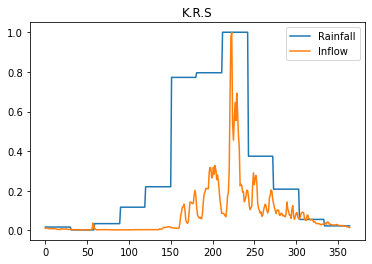

In [23]:
plot_inflow_rainfall(krs_df)

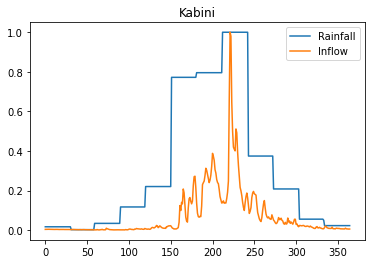

In [24]:
plot_inflow_rainfall(kabini_df)

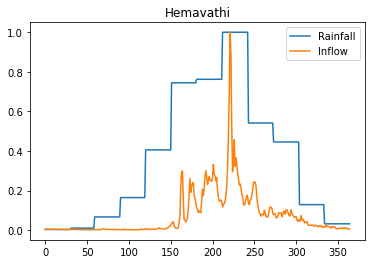

In [25]:
plot_inflow_rainfall(hemavathi_df)

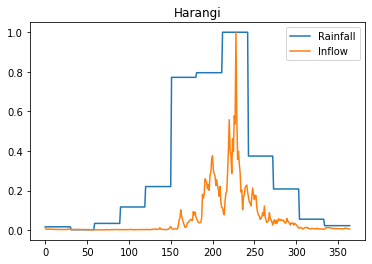

In [26]:
plot_inflow_rainfall(harangi_df)

In [ ]:
x = krs_df[krs_df['YEAR'] == 2018].reset_index(drop=True)

In [ ]:
x['ROLL'] = x['RAINFALL'].rolling(window=25, min_periods=1, center=True).mean()

In [ ]:
x.head()

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0,0.0
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0,0.0
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0,0.0
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0,0.0
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0,0.0


In [ ]:
x.loc[x[(x['DATE'] <= 20) & (x['DATE'] >= 10)].index, ('ROLL')] = np.nan
x

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0000,0.0000
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0000,0.0000
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0000,0.0000
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0000,0.0000
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,K.R.S,36.79,114.76,1050.0,1542.0,2018,12,27,360,0.2645,0.2645
361,2018-12-28,K.R.S,36.72,114.70,921.0,1542.0,2018,12,28,361,0.2645,0.2645
362,2018-12-29,K.R.S,36.66,114.65,622.0,1114.0,2018,12,29,362,0.2645,0.2645
363,2018-12-30,K.R.S,36.64,114.63,582.0,686.0,2018,12,30,363,0.2645,0.2645


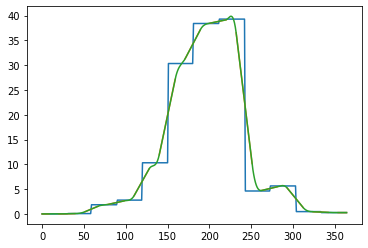

In [ ]:
plt.plot(x['RAINFALL'])
plt.plot(x['ROLL'])
plt.plot(x['ROLL'].interpolate(method='cubic'))
plt.show()

In [ ]:
x

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0000,0.0000
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0000,0.0000
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0000,0.0000
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0000,0.0000
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,K.R.S,36.79,114.76,1050.0,1542.0,2018,12,27,360,0.2645,0.2645
361,2018-12-28,K.R.S,36.72,114.70,921.0,1542.0,2018,12,28,361,0.2645,0.2645
362,2018-12-29,K.R.S,36.66,114.65,622.0,1114.0,2018,12,29,362,0.2645,0.2645
363,2018-12-30,K.R.S,36.64,114.63,582.0,686.0,2018,12,30,363,0.2645,0.2645


In [ ]:
y = x.groupby(['MONTH']).apply(lambda x: [x['RAINFALL'].sum(), x['ROLL'].sum()])

In [ ]:
(np.stack(y)[:, 0] - np.stack(y)[:, 1]).sum()

1475.6123200000118

In [ ]:
np.abs(np.stack(y)[:, 0] - np.stack(y)[:, 1]).sum()

1606.319488000005